In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
A = np.array([
    [0,1,0,0],
    [0,0,1,1],
    [0,1,0,0],
    [1,0,1,0]],
    dtype=float
)

In [3]:
myGraph = nx.DiGraph(A)

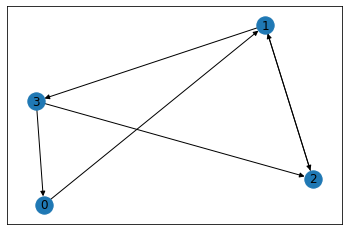

In [4]:
nx.draw_networkx(myGraph)
plt.show()

In [5]:
X = np.matrix([
            [i, -i]
            for i in range(A.shape[0])
        ], dtype=float)
print(X)

[[ 0.  0.]
 [ 1. -1.]
 [ 2. -2.]
 [ 3. -3.]]


In [6]:
A*X

matrix([[ 1., -1.],
        [ 5., -5.],
        [ 1., -1.],
        [ 2., -2.]])

In [7]:
I = np.matrix(np.eye(A.shape[0]))
A_hat = A + I
A_hat * X

matrix([[ 1., -1.],
        [ 6., -6.],
        [ 3., -3.],
        [ 5., -5.]])

In [8]:
D = np.array(np.sum(A, axis=0))
D = np.matrix(np.diag(D))
print(D)

[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 2. 0.]
 [0. 0. 0. 1.]]


In [9]:
D_hat = np.sum(np.array(A_hat), axis=0)
D_hat = np.matrix(np.diag(D_hat))
print(D_hat)

[[2. 0. 0. 0.]
 [0. 3. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 2.]]


In [10]:
X1 = D_hat**-1 * A_hat * X
W1 = np.random.normal(loc=0, scale=1, size=(2,2))
X11 = np.tanh(X1*W1)
X11

matrix([[0.41391023, 0.34727569],
        [0.9426461 , 0.89556822],
        [0.70674049, 0.6198029 ],
        [0.97581986, 0.94800558]])

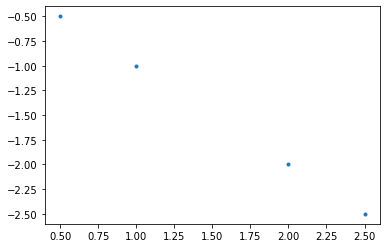

In [11]:
plt.plot(X1[:,0],X1[:,1],'.')

In [12]:
from networkx import karate_club_graph, to_numpy_matrix
from torch_geometric.utils import to_networkx

zkc = karate_club_graph()
order = sorted(list(zkc.nodes))
A = to_numpy_matrix(zkc, nodelist=order)
I = np.eye(zkc.number_of_nodes())
A_h = A + I
D_h = np.array(np.sum(np.array(A_h), axis=0))
D_h = np.matrix(np.diag(D_h))
W_1 = np.random.normal(loc=0, scale=1, size=(zkc.number_of_nodes(),4))
W_2 = np.random.normal(loc=0, scale=1, size=(W_1.shape[1],2))

def relu(X):
    return np.maximum(0,X)

def softmax(X):
    expo = np.exp(X)
    expo_sum = np.sum(np.exp(X))
    return expo/expo_sum

def gcn_layer(A_hat, D_hat, X, W):
    return (D_hat**-1 * A_hat * X * W)

H_1 = gcn_layer(A_h, D_h, I, W_1)
H_2 = gcn_layer(A_h, D_h, H_1, W_2)

output = np.tanh(H_2)

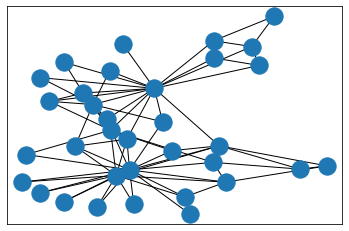

In [13]:
nx.draw_networkx(zkc, pos=nx.spring_layout(zkc, seed=42), with_labels=False,
                          cmap="Set2")
plt.show()

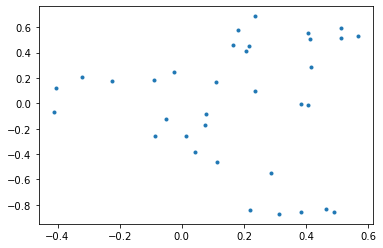

In [14]:
plt.plot(output[:,0],output[:,1],'.')

In [15]:
callgraph = np.loadtxt('fgraph_G.txt', dtype=str)
callentityunique = np.unique(callgraph[:])
callentityunique
callGraph = nx.DiGraph()
callGraph.add_nodes_from(callentityunique)
callGraph.add_edges_from(callgraph)
Order = sorted(list(callGraph.nodes))
callG = to_numpy_matrix(callGraph, nodelist=Order)
callG_hat = callG + np.matrix(np.eye(callG.shape[0]))


In [16]:
callG_hat = callG + np.matrix(np.eye(callG.shape[0]))
DcallG_hat = np.sum(np.array(callG_hat), axis=0)
DcallG_hat = np.matrix(np.diag(DcallG_hat))
print(DcallG_hat)

Icall = np.matrix(np.eye(callG.shape[0]))
W1 = np.random.normal(loc=0, scale=1, size=(callGraph.number_of_nodes(),128))
W2 = np.random.normal(loc=0, scale=1, size=(128,4))
W3 = np.random.normal(loc=0, scale=1, size=(4,2))

H1 = gcn_layer(callG_hat, DcallG_hat, Icall, W1)
H2 = gcn_layer(callG_hat, DcallG_hat, H1, W2)
H3 = gcn_layer(callG_hat, DcallG_hat, relu(H2), W3)

H3 = np.tanh(H3)

#H_1 = gcn_layer(A_h, D_h, I, W_1)
#H_2 = gcn_layer(A_h, D_h, H_1, W_2)

[[2.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 2.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 4.472e+03 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 4.472e+03 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 4.472e+03]]


5275
14791447


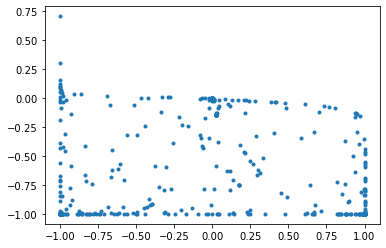

In [17]:
plt.plot(H3[:,0],H3[:,1],'.')
print(callGraph.number_of_nodes())
print(callGraph.number_of_edges())

In [18]:
meetGraph = np.loadtxt('meet_codes.csv',dtype=str)
meetGraph

array(['EREXYIPYZS', 'WTKTAXKIIU', 'WTKTAXKIIU', ..., 'EDTKAAGAZN',
       'EDTKAAGAZN', 'EDTKAAGAZN'], dtype='<U10')

In [19]:
import pandas as pd
meetGraph1 = pd.read_csv('meet_logs_1602310788791.csv')
meetGraph1.head()

,Date,Event Name,Event Description,Meeting Code,Participant Identifier,Participant Outside Organisation,Client Type,Organizer Email,Product Type,Duration,...,Video Receive Duration,Video Receive Short Side Median,Network Congestion Ratio,Video Send Bitrate Mean in kbps,Video Send FPS Mean,Video Send Long Side Median,Video Send Packet Loss Max,Video Send Packet Loss Mean,Video Send Duration,Video Send Short Side Median
0,"Oct 10, 2020, 11:46:27 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,EREXYIPYZS,201852001@iiitvadodara.ac.in,No,Android,201852020@iiitvadodara.ac.in,Google Meet,1057.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,"Oct 10, 2020, 11:45:38 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,WTKTAXKIIU,NaN,Yes,Android,NaN,Google Meet,1376.0,...,1020.0,352.0,0.0,161.0,4.0,320.0,0.0,0.0,30.0,176.0
2,"Oct 10, 2020, 11:44:09 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,WTKTAXKIIU,NaN,Yes,Web,NaN,Google Meet,1942.0,...,789.0,176.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,"Oct 10, 2020, 11:40:06 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,WTKTAXKIIU,pk_ahluwalia@iiitvadodara.ac.in,No,Web,NaN,Google Meet,334.0,...,169.0,176.0,29.0,259.0,10.0,320.0,35.0,4.0,189.0,180.0
4,"Oct 10, 2020, 11:39:09 AM GMT+5:30",Endpoint left,The endpoint left a video meeting,WTKTAXKIIU,NaN,Yes,Web,NaN,Google Meet,825.0,...,416.0,176.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [20]:
df = pd.DataFrame(meetGraph1)
df['Participant Identifier'].unique().size

691